In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import fetch_california_housing


In [6]:
df=fetch_california_housing()

In [7]:
dataset=pd.DataFrame(df.data)

In [8]:
dataset.columns=df.feature_names

In [9]:
## Independent and depeyndent features
x=dataset
y=df.target

In [10]:
# Train test split
from sklearn.model_selection import train_test_split
# x_train and y_train to test the model 
# x_test and y_test to test the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [11]:
## standardization the dataset
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [12]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Ridge Regression

In [13]:
from sklearn.linear_model import Ridge
#for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

In [14]:
ridge_regressor=Ridge()

In [15]:
ridge_regressor

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [16]:
parameters={'alpha':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90]} # all value to test for alpha
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(x_train,y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,7


In [17]:
print(ridgecv.best_params_)

{'alpha': 7}


In [18]:
print(ridgecv.best_score_)

-0.526817617099752


In [19]:
ridge_predict=ridgecv.predict(x_test)

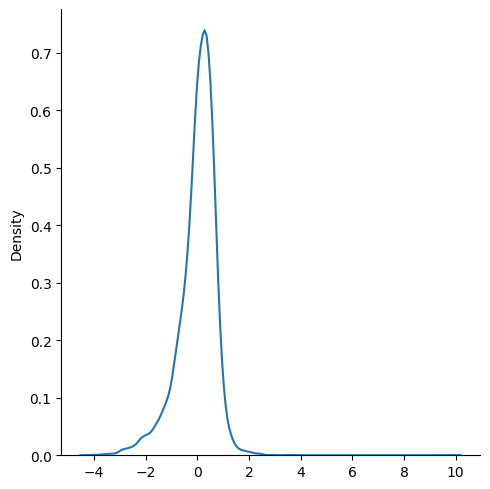

In [20]:
import seaborn as sns
sns.displot(ridge_predict-y_test, kind='kde') # diff of got value and actual

In [21]:
from sklearn.metrics import r2_score


In [22]:
score=r2_score(ridge_predict,y_test)

In [23]:
score

0.3433218965947866

# Lasso

In [24]:
from sklearn.linear_model import Lasso

In [25]:
lasso=Lasso()

In [26]:
parameters={'alpha':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90]} # all value to test for alpha
lassocv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(x_train,y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,7


In [27]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 7}
-0.526817617099752


In [29]:
lasso_predict=ridgecv.predict(x_test)

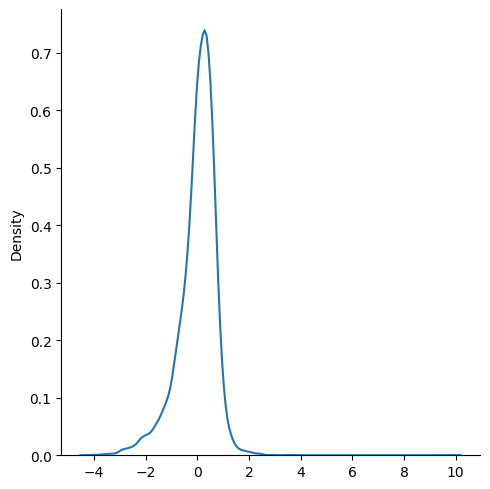

In [30]:
import seaborn as sns
sns.displot(lasso_predict-y_test, kind='kde') # diff of got value and actual